<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

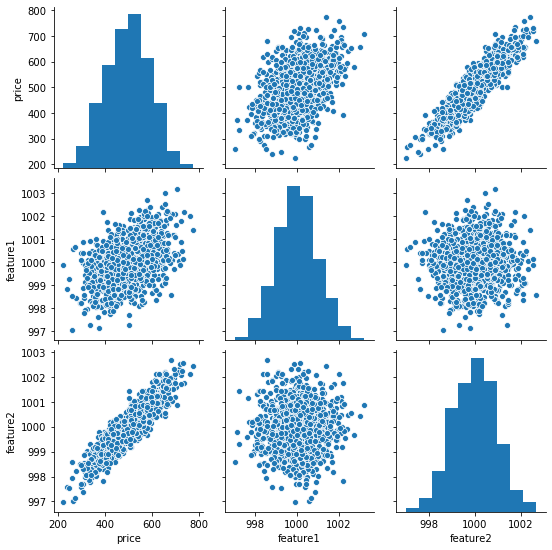

In [6]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values # numpy array, not pandas series

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
X_train.shape

(700, 2)

In [28]:
X_test.shape

(300, 2)

In [29]:
y_train.shape

(700,)

In [30]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
#help(MinMaxScaler)

In [33]:
scaler = MinMaxScaler()

In [34]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [35]:
scaler.fit(X_train)

MinMaxScaler()

In [36]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [37]:
import tensorflow as tf

In [38]:
from tensorflow.keras.models import Sequential

In [45]:
# help(Sequential)
Sequential?

Init signature: Sequential(layers=None, name=None)
Docstring:     
Linear stack of layers.

Arguments:
    layers: list of layers to add to the model.

Example:

```python
# Optionally, the first layer can receive an `input_shape` argument:
model = Sequential()
model.add(Dense(32, input_shape=(500,)))
# Afterwards, we do automatic shape inference:
model.add(Dense(32))

# This is identical to the following:
model = Sequential()
model.add(Dense(32, input_dim=500))

# And to the following:
model = Sequential()
model.add(Dense(32, batch_input_shape=(None, 500)))

# Note that you can also omit the `input_shape` argument:
# In that case the model gets built the first time you call `fit` (or other
# training and evaluation methods).
model = Sequential()
model.add(Dense(32))
model.add(Dense(32))
model.compile(optimizer=optimizer, loss=loss)
# This builds the model for the first time:
model.fit(x, y, batch_size=32, epochs=10)

# Note that when using this delayed-build pattern (no input shape sp

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),  # Layer 1 with 2 neurons
    Dense(units=2),  # Layer 2 with 2 neurons
    Dense(units=2)   # Layer 3 with 2 neurons
])

### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2)) # First Layer
model.add(Dense(2)) # Second layer
model.add(Dense(2)) # Third / Last Layer

Adding layer method tend to be more useful because we can edit the NN by adding or removing layers with just simple comments

Let's go ahead and build a simple model and then compile it by defining our solver

In [43]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction  VERY IMPORTANT!!
model.add(Dense(1))  #Try to predict the price, depends on the propuse of the task we want to solve

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [44]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 9s 13ms/sample - loss: 256582.6041s - loss: 258858.60
Epoch 2/250
700/700 [==============================] - 0s 490us/sample - loss: 256395.5055
Epoch 3/250
700/700 [==============================] - 0s 384us/sample - loss: 256183.8533
Epoch 4/250
700/700 [==============================] - 0s 351us/sample - loss: 255954.7098
Epoch 5/250
700/700 [==============================] - 0s 336us/sample - loss: 255702.1830
Epoch 6/250
700/700 [==============================] - 0s 307us/sample - loss: 255420.9984
Epoch 7/250
700/700 [==============================] - 0s 273us/sample - loss: 255107.6204
Epoch 8/250
700/700 [==============================] - 0s 306us/sample - loss: 254761.3096
Epoch 9/250
700/700 [==============================] - 0s 244us/sample - loss: 254379.0692
Epoch 10/250
700/700 [==============================] - 0s 244us/sample - loss: 253955.6104 - loss: 254242.05
Epoch 11/250
700/700 [==========

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [26]:
model.history.history

{'loss': [257046.02053571428,
  256727.57410714286,
  256522.99767857144,
  256373.04339285713,
  256208.80839285714,
  256017.87419642857,
  255794.63875,
  255536.61446428573,
  255246.50839285715,
  254920.9007142857,
  254556.80571428573,
  254155.80767857144,
  253712.6569642857,
  253222.941875,
  252682.845,
  252086.95839285714,
  251436.20464285713,
  250726.11482142858,
  249952.45232142857,
  249109.92089285713,
  248200.0200892857,
  247215.95776785715,
  246154.1205357143,
  245005.08839285714,
  243780.42348214285,
  242465.37642857144,
  241055.46339285714,
  239559.661875,
  237966.36696428573,
  236272.626875,
  234471.03642857142,
  232554.95428571428,
  230538.98651785715,
  228401.81401785713,
  226150.31267857144,
  223783.81348214287,
  221290.60571428572,
  218679.40830357143,
  215924.69125,
  213063.56241071428,
  210046.38044642858,
  206900.92839285714,
  203611.78616071428,
  200231.52544642857,
  196671.46205357142,
  192974.43410714285,
  189174.2291071428

In [46]:
loss = model.history.history['loss']

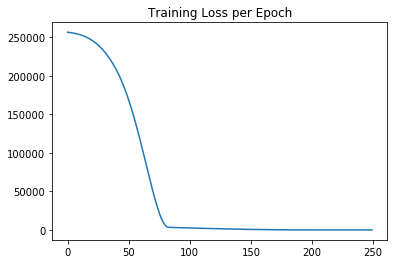

In [47]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [48]:
model.metrics_names

['loss']

In [51]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [52]:
training_score

24.00204119001116

In [53]:
test_score

25.001779607137046

### Further Evaluations

In [54]:
test_predictions = model.predict(X_test)

In [55]:
test_predictions

array([[405.00842],
       [623.3837 ],
       [591.9548 ],
       [572.04785],
       [366.3264 ],
       [579.     ],
       [514.8475 ],
       [458.85214],
       [549.0534 ],
       [447.25665],
       [611.62286],
       [548.7339 ],
       [418.82767],
       [408.5938 ],
       [651.08813],
       [437.03278],
       [508.21945],
       [659.8082 ],
       [662.4551 ],
       [565.3432 ],
       [333.91248],
       [444.57623],
       [382.23724],
       [378.458  ],
       [566.4077 ],
       [610.4361 ],
       [532.18475],
       [427.59094],
       [655.3149 ],
       [413.8003 ],
       [442.3715 ],
       [484.89276],
       [438.15143],
       [681.73236],
       [424.4793 ],
       [417.41797],
       [501.68774],
       [550.27673],
       [509.5228 ],
       [395.0831 ],
       [618.42993],
       [416.35004],
       [604.28046],
       [445.693  ],
       [501.76398],
       [581.52185],
       [668.8611 ],
       [490.16565],
       [318.24216],
       [485.19373],


In [56]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [57]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [58]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [59]:
test_predictions

0      405.008423
1      623.383728
2      591.954773
3      572.047852
4      366.326385
          ...    
295    528.840759
296    515.135132
297    609.486328
298    416.674194
299    410.602844
Length: 300, dtype: float32

In [60]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [61]:
pred_df.columns = ['Test Y','Model Predictions']

In [62]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.008423
1,624.156198,623.383728
2,582.455066,591.954773
3,578.588606,572.047852
4,371.224104,366.326385
...,...,...
295,525.704657,528.840759
296,502.909473,515.135132
297,612.727910,609.486328
298,417.569725,416.674194


Let's compare to the real test labels!

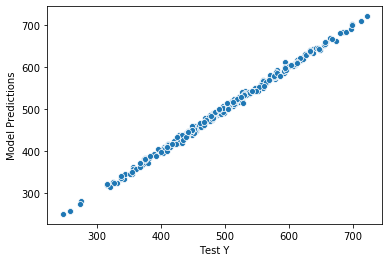

In [63]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [64]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

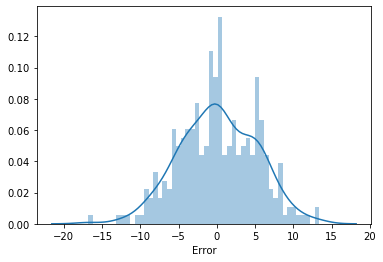

In [65]:
sns.distplot(pred_df['Error'],bins=50)

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Error given in target units, in this case the mean absolute error is about $4.00 USD

In [67]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.0009106325324835

In [47]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

26.798188995783907

In [68]:
# Essentially the same thing, difference just due to precision
test_score

25.001779607137046

In [69]:
#RMSE
test_score**0.5

5.000177957546816

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [70]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [71]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [72]:
new_gem = scaler.transform(new_gem)

In [73]:
model.predict(new_gem)

array([[419.42603]], dtype=float32)

## Saving and Loading a Model

In [74]:
from tensorflow.keras.models import load_model

In [75]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [76]:
later_model = load_model('my_model.h5')

In [77]:
later_model.predict(new_gem)

array([[419.42603]], dtype=float32)